# Importing the Necessary Libraries

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import pandas as pd

import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt

from pandas.plotting import parallel_coordinates
from math import sqrt

%matplotlib inline

# Creating a Pandas DataFrame from a CSV file

In [37]:
#file_name = '../original/D31.csv'
#file_name = '../original/g2-2-50.csv'
#file_name = '../original/g2-2-30.csv'
dataset_clusters = 2

#file_name = 'noised/g2-2-30.csv'
#file_name = 'evaluation.csv'

#file_name = '../gaussian100.csv'
#file_name = '../CE3/iris.csv'
#file_name = '../CE3/wine.csv'
#file_name = '../CE3/wdbc.csv'
#file_name = '../CE3/glass.csv'

# To get file in "result" folder use "HDBSCAN.py" 
#file_name = '../result2/t4.8k.csv'
#file_name = '../result2/t5.8k.csv'
#file_name = '../result2/t8.8k.csv'
#file_name = '../result2/t7.10k.csv'

#file_name = '../result2/g2-2-30.csv'
#file_name = '../result2/varying_densities.csv'


In [38]:
# Overlapped Datasets
#file_name = '../BS3WC-Datasets/overlapped/scene.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-beach.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-sunset.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-fall.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-field.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-mountain.csv'
#file_name = '../BS3WC-Datasets/overlapped/scene-urban.csv'

#file_name = '../BS3WC-Datasets/overlapped/birds.csv'

# Systhetic Datasets
#file_name = '../BS3WC-Datasets/Synthetic/a3.csv'
#file_name = '../BS3WC-Datasets/Synthetic/Aggregation.csv'
#file_name = '../BS3WC-Datasets/Synthetic/Compound.csv'
#file_name = '../BS3WC-Datasets/Synthetic/dim128.csv'
#file_name = '../BS3WC-Datasets/Synthetic/dim512.txt'
#file_name = '../BS3WC-Datasets/Synthetic/flame.csv'
#file_name = '../BS3WC-Datasets/Synthetic/jain.txt'
file_name = '../BS3WC-Datasets/Synthetic/pathbased.csv'
#file_name = '../BS3WC-Datasets/Synthetic/R15.txt'
#file_name = '../BS3WC-Datasets/Synthetic/s1.txt'
#dataset_clusters = 15
#file_name = '../BS3WC-Datasets/Synthetic/s2.txt'
#dataset_clusters = 15
#file_name = '../BS3WC-Datasets/Synthetic/spiral.txt'
#file_name = '../BS3WC-Datasets/Synthetic/unbalance.txt'
#dataset_clusters = 8

# Real Datasets
#file_name = '../BS3WC-Datasets/Real/CNAE-9.data'
#file_name = '../BS3WC-Datasets/Real/dermatology.data'
#file_name = '../BS3WC-Datasets/Real/ecoli.data'
#file_name = '../BS3WC-Datasets/Real/glass.data'
#file_name = '../BS3WC-Datasets/Real/iris.data'
#file_name = '../BS3WC-Datasets/Real/seeds_dataset.data'
#file_name = '../BS3WC-Datasets/Real/segmentation.csv'
#file_name = '../BS3WC-Datasets/Real/thyroid0387.data'
#file_name = '../BS3WC-Datasets/Real/waveform.data'
#file_name = '../BS3WC-Datasets/Real/waveform2.data'
#file_name = '../BS3WC-Datasets/Real/wdbc.data'
#file_name = '../BS3WC-Datasets/Real/wine.data'
#file_name = '../BS3WC-Datasets/Real/yeast.data'

In [39]:
file_name = 'data/mnist_test.csv'
dataset_clusters = 10


In [40]:
data = pd.read_csv(file_name)

In [41]:
average_divid = 1.5

if 'pathbased' in file_name:
    average_divid = 2

In [42]:
folder_name = '../images-visual'
#folder_name = '../images-visual'
split_arr = file_name.split('/')
if '.csv' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.csv','').lower()
if '.txt' in file_name:
    identity_name = split_arr[len(split_arr)-1].replace('.txt','').lower()
    
new_file_name = identity_name
identity_name = identity_name.replace('.','-')
identity_name = identity_name.replace('_','-')
identity_name = identity_name.replace(' ','-')
print(identity_name)

file_measures = "../Measurements/" + identity_name + "-measures.txt"
open(file_measures,"w+") 

mnist-test


<_io.TextIOWrapper name='../Measurements/mnist-test-measures.txt' mode='w+' encoding='UTF-8'>

In [43]:
from sklearn.metrics.cluster import normalized_mutual_info_score
    
def calculate_NMI(inside_points, labels, ground_truth, file_name, caption):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for f in inside_points:
        X.append(ground_truth[f])
        Y.append(labels[f])
    
    nmi = normalized_mutual_info_score(X, Y)
    print("Normalized Mutual Information (" + caption + "): %0.4f"% nmi)
    file.write("Normalized Mutual Information (" + caption + "): %0.4f\n"% nmi)


In [44]:
#calculate_NMI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

In [45]:
from sklearn.metrics.cluster import adjusted_rand_score

def calculate_ARI(inside_points, labels, ground_truth, file_name, caption, no_outliers=False):
    
    file = open(file_name, "a+")

    X = []
    Y = []
    
    for f in inside_points:
        X.append(ground_truth[f])
        Y.append(labels[f])
    
    ari = adjusted_rand_score(X, Y)
    
    print("Adjusted Random Index (" + caption + "): %0.4f"% ari)
    file.write("Adjusted Random Index (" + caption + "): %0.4f\n"% ari)


In [46]:
#calculate_ARI(final_inside, clusters_labels, ground_truth, file_measures, 'Blur')

In [47]:
def calculate_db_index(inside_points, labels, file_name, caption):
    from sklearn.metrics import davies_bouldin_score 
    import sklearn
    file = open(file_name, "a+")
    
    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    db_index = davies_bouldin_score(X, Y)
    print("DB Index Score (" + caption + "): %0.4f\n"% db_index)
    file.write("DB Index Score (" + caption + "): %0.4f\n"% db_index)

In [48]:
#calculate_db_index(final_inside, clusters_labels, file_measures)

In [49]:
def calculate_silhouette_score(inside_points, labels, file_name, caption):
    file = open(file_name, "a+")

    X = []
    Y = []
    for f in inside_points:
        X.append(f)
        Y.append(labels[f])
    
    #X = np.array(X)
    #Y = np.array(Y)
    
    silhouette_coef = metrics.silhouette_score(X, Y)
    print("Silhouette Coefficient (" + caption + "): %0.4f"% silhouette_coef)
    file.write("Silhouette Coefficient (" + caption + "): %0.4f\n"% silhouette_coef)


In [50]:
def calculate_silhouette_samples(sampled_df, features, clusters, file_name, caption):
    file = open(file_name, "a+")
    
    c_k_o_i = np.zeros((len(sampled_df),len(clusters)))
    X = np.array(sampled_df[features])
    Y = np.array(sampled_df['L'])
    
    for i in range(c_k_o_i.shape[0]):
        actual_val = Y[i] 
        if i%20 == 0:
            print(i)
        for j in range(c_k_o_i.shape[1]):
            Y[i] = j
            silhouette_coefs = metrics.silhouette_samples(X, Y)
            c_k_o_i[i][j] = silhouette_coefs[i]
        
        Y[i] = actual_val
    
    #for f in inside_points:
    #    X.append(f)
    #    Y.append(labels[f])
    #silhouette_coefs = metrics.silhouette_samples(X, Y)
    
    return c_k_o_i

In [51]:
def getCentroids(clusters_labels, sampled_df, features):
    clusters = np.unique(clusters_labels)
    centroids = {}
    for i in clusters:
        cluster_dataset = sampled_df[features].loc[sampled_df['L'] == i]
        sum_of_cluster = np.sum(cluster_dataset, axis=0)
        centroids[i] = sum_of_cluster/len(cluster_dataset)
        
    return centroids

In [52]:
#cluster_centroids = getCentroids(clusters_labels, sampled_df, features)

In [53]:
def getCentroidNearest(clusters_labels, centroids):
    clusters = np.unique(clusters_labels)
    centroids_nearest = {}
    centroids_nearest_dist = {}
    
    for i in clusters:
        distance_sum = 0
        distance_min = 0
        centroids_nearest[i] = 0
        flag = False
        
        for j in clusters:
            if j == i:
                continue

            for col in features:
                distance_sum += (centroids[i][col] - centroids[j][col])**2
            if not flag:
                distance_min = distance_sum
                centroids_nearest[i] = j
                centroids_nearest_dist[i] = sqrt(distance_sum)
                flag = True
            else: 
                if distance_min > distance_sum:
                    distance_min = distance_sum
                    centroids_nearest[i] = j
                    centroids_nearest_dist[i] = sqrt(distance_sum)

    return centroids_nearest, centroids_nearest_dist

In [54]:
#centroids = getCentroids(clusters_labels, sampled_df)
#centroids_nearest, centroids_nearest_dist = getCentroidNearest(clusters_labels, centroids)

In [55]:
def calculate_silhouette_samples_2(sampled_df, features, clusters, file_name):
    file = open(file_name, "a+")
    
    c_k_o_i = np.zeros((len(sampled_df),len(clusters)))
    X = np.array(sampled_df[features])
    Y = np.array(sampled_df['L'])
    
    for i in range(c_k_o_i.shape[0]):
        data_point = sampled_df[features].iloc[i]
        if i%20 == 0 and i != 0:
            print(i)
            #print(c_k_o_i[i-1][j-1])
            
        for j in range(c_k_o_i.shape[1]):
            cluster_dataset = sampled_df[features].loc[sampled_df[label_col_name] == j]
            average_distance = 0
            
            for index, c_point in cluster_dataset.iterrows():
                distance_sum = 0
                for col in features:
                    distance_sum += (data_point[col] - c_point[col])**2
                        
                distance = sqrt(distance_sum)
                average_distance += distance
            
            average_distance = average_distance/len(cluster_dataset)
            a = average_distance
            
            #silhouette_coefs = metrics.silhouette_samples(X, Y)
            distance_sum = 0
            for col in features:
                distance_sum += (data_point[col] - centroids[centroids_nearest[j]][col])**2

            b = sqrt(distance_sum)
            
            c_k_o_i[i][j] = (b - a)/max(a,b)
        
    return c_k_o_i

In [56]:
def calculate_silhouette_samples_3(sampled_df, features, clusters_labels, file_name):
    file = open(file_name, "a+")

    clusters = np.unique(clusters_labels)
    c_k_o_i = np.zeros((len(sampled_df),len(clusters)))
    X = np.array(sampled_df[features])
    Y = np.array(sampled_df['L'])

    cluster_centroids = getCentroids(clusters, sampled_df, features)
    
    for i in range(c_k_o_i.shape[0]):
        data_point = sampled_df[features].iloc[i]
        if i%500 == 0 and i != 0:
            print(i)

        for j in range(c_k_o_i.shape[1]):

            count = 0
            distance_min = 0
            
            cluster_dataset = sampled_df[features].loc[sampled_df['L'] == j]
            average_distance = 0

            for index, c_point in cluster_dataset.iterrows():
                distance_sum = 0
                for col in features:
                    distance_sum += (data_point[col] - c_point[col])**2

            
            a = sqrt(distance_sum1)
            
            b = sqrt(distance_min)
            
            c_k_o_i[i][j] = (b - a)/max(a,b)
        
    return c_k_o_i

In [57]:
def calculate_silhouette_samples_4(sampled_df, features, clusters_labels, average_distance, file_name):
    clusters = np.unique(clusters_labels)
    c_k_o_i = np.zeros((len(sampled_df),len(clusters)))
    data_points = np.array(sampled_df[features])
        
    for i in range(c_k_o_i.shape[0]):
        score_dict = {}
        for c in clusters:
            score_dict[c] = 0
    
        data_point1 = data_points[i]
        if i%300 == 0 and i != 0:
            print(i)

        for j in range(c_k_o_i.shape[0]):
            data_point2 = data_points[j]
            
            distance_sum = 0
            for col in range(len(features)):
                distance_sum += (data_point1[col] - data_point2[col])**2
            
            dist = sqrt(distance_sum)
            if dist < (average_distance):
                score_dict[sampled_df.iloc[j]['L']] += 1
            
        for k1, v1 in score_dict.items():
            a = v1
            b = 0
            
            for k2, v2 in score_dict.items():
                if k2 == k1:
                    continue
                else:
                    if v2 > b:
                        b = v2
            if a == 0 and b == 0:
                c_k_o_i[i][k1] = 0
            else:
                c_k_o_i[i][k1] = (a - 2*b)/max(a,2*b)

    return c_k_o_i

In [58]:
#c_k_o_i_3 = calculate_silhouette_samples_4(sampled_df, features, clusters_labels, (average_distance/average_divid), folder_name + '/' + identity_name + '-normal-result2')

In [59]:
#c_k_o_i_3

In [60]:
#c_k_o_i_3 = calculate_silhouette_samples_3(sampled_df, features, clusters_labels, folder_name + '/' + identity_name + '-normal-result2')

In [61]:
def calculate_accuracy(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")

    X = []
    Y = []
    
    correct = 0
    total = len(inside_points)
    for f in inside_points:
        if labels[f] == ground_truth[f]:
            correct += 1
    
    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)
        
    print("Accuracy Score (" + caption + "): %0.4f"% accuracy)
    file.write("Accuracy Score (" + caption + "): %0.4f\n"% accuracy)

#calculate_accuracy(final_inside, clusters_labels, sampled_df, file_measures)

In [62]:
def calculate_confusion_matrix(inside_points, labels, dataset, file_name, caption, no_outliers=False):
    file = open(file_name, "a+")
    
    unique_labels = np.unique(dataset['L'])
    confusion_matrices = {}
    
    print("length: ", len(inside_points))
    X = []
    Y = []
    
    for lab in unique_labels:
        confusion_matrices[lab] = [0,0,0,0]

    correct = 0
    total = len(dataset)
    for index, o_c in dataset.iterrows():
        key = tuple(o_c[features])
        if key in labels:
            if labels[key] == o_c['L']:
                confusion_matrices[o_c['L']][0] += 1
            
                for lab in unique_labels:
                    if lab != o_c['L']:
                        confusion_matrices[lab][3] += 1
            else:
                if labels[key] == -1:
                    #continue # To check confusion matrix for other than outliers                    
                    for lab in unique_labels:
                        confusion_matrices[lab][2] += 1
                else:
                    confusion_matrices[labels[key]][1] += 1
            
                    for lab in unique_labels:
                        if lab != labels[key]:
                            confusion_matrices[lab][2] += 1

    if total == 0:
        accuracy = 0
    else:
        accuracy = (correct/total)*100

    print("Confusion Matrices (" + caption + "): " + str(confusion_matrices) )
    file.write("Confusion Matrices (" + caption + "): " + str(confusion_matrices) + "\n")

#calculate_confusion_matrix(final_inside, clusters_labels, sampled_df, file_measures)

# Data Description


In [63]:
def write_outliers_detected(final_inside,final_partial,final_outside,file_name, caption):
    file = open(file_name, "a+")
    file.write("Total Objects (" + caption + "): %0.4f\n"% (len(final_inside)+len(final_partial)+len(final_outside)))
    file.write("Outliers Detected By BS3 (" + caption + "): %0.4f\n"% (len(final_outside)+len(final_partial)))

In [64]:
data.head()

Col1  Col2  Col3  Col4  Col5  Col6  Col7  Col8  Col9  Col10  ...  Col776  \
0     0     0     0     0     0     0     0     0     0      0  ...       0   
1     0     0     0     0     0     0     0     0     0      0  ...       0   
2     0     0     0     0     0     0     0     0     0      0  ...       0   
3     0     0     0     0     0     0     0     0     0      0  ...       0   
4     0     0     0     0     0     0     0     0     0      0  ...       0   

   Col777  Col778  Col779  Col780  Col781  Col782  Col783  Col784  L  
0       0       0       0       0       0       0       0       0  7  
1       0       0       0       0       0       0       0       0  2  
2       0       0       0       0       0       0       0       0  1  
3       0       0       0       0       0       0       0       0  0  
4       0       0       0       0       0       0       0       0  4  

[5 rows x 785 columns]

In [65]:
data.shape

(3000, 785)

# Data Sampling

In [66]:
#sampled_df = data[(data['Col1']/data['Col1']) == 1]
sampled_df = data
sampled_df.shape

(3000, 785)

In [67]:
sampled_df.head()

Col1  Col2  Col3  Col4  Col5  Col6  Col7  Col8  Col9  Col10  ...  Col776  \
0     0     0     0     0     0     0     0     0     0      0  ...       0   
1     0     0     0     0     0     0     0     0     0      0  ...       0   
2     0     0     0     0     0     0     0     0     0      0  ...       0   
3     0     0     0     0     0     0     0     0     0      0  ...       0   
4     0     0     0     0     0     0     0     0     0      0  ...       0   

   Col777  Col778  Col779  Col780  Col781  Col782  Col783  Col784  L  
0       0       0       0       0       0       0       0       0  7  
1       0       0       0       0       0       0       0       0  2  
2       0       0       0       0       0       0       0       0  1  
3       0       0       0       0       0       0       0       0  0  
4       0       0       0       0       0       0       0       0  4  

[5 rows x 785 columns]

In [68]:
import csv

def write_to_file(file_name, values, header_names=False):
    with open(file_name, 'w') as writeFile:
        writer = csv.writer(writeFile)
        if header_names:
            writer.writerow(header_names)
        writer.writerows(values)
        

# Statistics


In [69]:
sampled_df.describe().transpose()


count      mean       std  min  25%  50%  75%  max
Col1    3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col2    3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col3    3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col4    3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col5    3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
...        ...       ...       ...  ...  ...  ...  ...  ...
Col781  3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col782  3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col783  3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col784  3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
L       3000.0  4.439333  2.855936  0.0  2.0  4.0  7.0  9.0

[785 rows x 8 columns]

# Select Features of Interest for Clustering


In [70]:
print(file_name)

#IRIS Dataset -OR- Four Featured datasets
if 'iris' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4']

#WINE Dataset -OR- Thirteen Featured datasets
elif 'wine' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 
                'Col11', 'Col12', 'Col13']

#WDBC Dataset -OR- Thirty Featured datasets
elif 'wdbc' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30']

elif 'dermatology' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10',
                'Col11', 'Col12', 'Col13', 'Col14','Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20',
                'Col21', 'Col22', 'Col23', 'Col24','Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30',
                'Col31', 'Col32', 'Col33', 'Col34']

#GLASS Dataset -OR- Nine Featured datasets
elif 'glass' in file_name:
    features = ['Col1', 'Col2', 'Col3', 'Col4','Col5', 'Col6', 'Col7', 'Col8', 'Col9']

elif 'scene' in file_name:
    features = ['Col'+str(i+1) for i in range(294)]

elif 'mnist' in file_name:
    features = ['Col'+str(i+1) for i in range(784)]

#Other Dataset -OR- Two Featured datasets
else:
    features = ['Col1', 'Col2']

select_df_test_flag = False
if 'Out' in sampled_df:
    select_df = sampled_df[sampled_df['Out'] == 1][features]
    select_df_test = sampled_df[sampled_df['Out'] != 1][features]
    select_df_test_out = sampled_df[sampled_df['Out'] == 3][features]
    select_df_test_flag = True
else:
    select_df = sampled_df[features]

#X = StandardScaler().fit_transform(select_df)
print(features)

data/mnist_test.csv
['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9', 'Col10', 'Col11', 'Col12', 'Col13', 'Col14', 'Col15', 'Col16', 'Col17', 'Col18', 'Col19', 'Col20', 'Col21', 'Col22', 'Col23', 'Col24', 'Col25', 'Col26', 'Col27', 'Col28', 'Col29', 'Col30', 'Col31', 'Col32', 'Col33', 'Col34', 'Col35', 'Col36', 'Col37', 'Col38', 'Col39', 'Col40', 'Col41', 'Col42', 'Col43', 'Col44', 'Col45', 'Col46', 'Col47', 'Col48', 'Col49', 'Col50', 'Col51', 'Col52', 'Col53', 'Col54', 'Col55', 'Col56', 'Col57', 'Col58', 'Col59', 'Col60', 'Col61', 'Col62', 'Col63', 'Col64', 'Col65', 'Col66', 'Col67', 'Col68', 'Col69', 'Col70', 'Col71', 'Col72', 'Col73', 'Col74', 'Col75', 'Col76', 'Col77', 'Col78', 'Col79', 'Col80', 'Col81', 'Col82', 'Col83', 'Col84', 'Col85', 'Col86', 'Col87', 'Col88', 'Col89', 'Col90', 'Col91', 'Col92', 'Col93', 'Col94', 'Col95', 'Col96', 'Col97', 'Col98', 'Col99', 'Col100', 'Col101', 'Col102', 'Col103', 'Col104', 'Col105', 'Col106', 'Col107', 'Col108', 'Col109

In [71]:
print(select_df.shape)
if select_df_test_flag:
    print(select_df_test.shape)

(3000, 784)


In [72]:
select_df.head()

Col1  Col2  Col3  Col4  Col5  Col6  Col7  Col8  Col9  Col10  ...  Col775  \
0     0     0     0     0     0     0     0     0     0      0  ...       0   
1     0     0     0     0     0     0     0     0     0      0  ...       0   
2     0     0     0     0     0     0     0     0     0      0  ...       0   
3     0     0     0     0     0     0     0     0     0      0  ...       0   
4     0     0     0     0     0     0     0     0     0      0  ...       0   

   Col776  Col777  Col778  Col779  Col780  Col781  Col782  Col783  Col784  
0       0       0       0       0       0       0       0       0       0  
1       0       0       0       0       0       0       0       0       0  
2       0       0       0       0       0       0       0       0       0  
3       0       0       0       0       0       0       0       0       0  
4       0       0       0       0       0       0       0       0       0  

[5 rows x 784 columns]

In [73]:
num_of_clusters = 0

In [74]:
label_col_name = 'L'
#sampled_df.drop('L', axis=1, inplace=True)
#sampled_df

In [75]:
if 'L' in sampled_df:
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = int(i-1)


    print(np.unique(sampled_df[label_col_name]))
    ##################################
    
    clusters_labels = np.unique(sampled_df['L'])
    print(clusters_labels)
    num_of_clusters = len(clusters_labels)

else:    
    num_of_clusters = dataset_clusters
    #X = StandardScaler().fit_transform(select_df)
    kmeans = KMeans(n_clusters=num_of_clusters)
    model = kmeans.fit_predict(select_df)
    centroids = np.unique(kmeans.cluster_centers_)
    clusters_labels = kmeans.labels_
    
    print("Centroids: ", centroids)
    print("model\n", model)
    #plt.scatter(X[:, 0], X[:, 1], c=model)
    #plt.scatter(select_df['Col1'], select_df['Col2'], c=model)
    plt.title("KMean Clusters")
    plt.show()

    sampled_df['L'] = kmeans.labels_
    
    ##################################
    print(np.unique(sampled_df[label_col_name]))
    for i in np.sort(np.unique(sampled_df[label_col_name])):
        if i == 0:
            break
        sampled_df.L[sampled_df.L == i] = int(i-1)


    print(np.unique(sampled_df[label_col_name]))
    ##################################

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


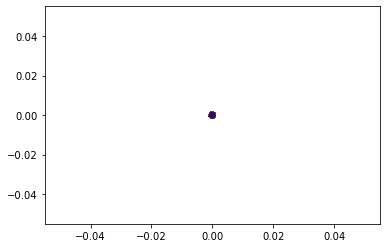

In [76]:
plt.scatter(sampled_df['Col1'], sampled_df['Col2'], c=sampled_df['L'])    

In [77]:
import random
def getColorsInside():
    colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']
    for each in np.linspace(0, 1, num_of_clusters, retstep=False):
        colors.append(plt.cm.Spectral(each))
    colors.append('black')
    return colors
    

In [78]:
colors_inside = getColorsInside()

In [79]:
def plot_original_clusters(final_list, clusters_labels, size, colors, description, image_name):
    final_list = np.array(final_list)    
    if len(final_list) > 0:
        for i in range(len(final_list)):
            col = colors[int(sampled_df['L'][i])]
            plt.plot(sampled_df['Col1'][i], sampled_df['Col2'][i], '.', color=col)
        #plt.title(str(description))
        
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.savefig(image_name + '.pdf')  
        
        #No need to include plt.show() if you have used savefig(), although, if you want to use then use it at then end.
        #plt.show

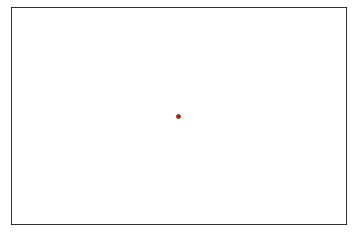

In [80]:
plot_original_clusters(sampled_df, sampled_df['L'], 5, colors_inside, "Original Plot: ", folder_name + '/' + identity_name + '-original-result')

In [81]:
sampled_df.head()

Col1  Col2  Col3  Col4  Col5  Col6  Col7  Col8  Col9  Col10  ...  Col776  \
0     0     0     0     0     0     0     0     0     0      0  ...       0   
1     0     0     0     0     0     0     0     0     0      0  ...       0   
2     0     0     0     0     0     0     0     0     0      0  ...       0   
3     0     0     0     0     0     0     0     0     0      0  ...       0   
4     0     0     0     0     0     0     0     0     0      0  ...       0   

   Col777  Col778  Col779  Col780  Col781  Col782  Col783  Col784  L  
0       0       0       0       0       0       0       0       0  7  
1       0       0       0       0       0       0       0       0  2  
2       0       0       0       0       0       0       0       0  1  
3       0       0       0       0       0       0       0       0  0  
4       0       0       0       0       0       0       0       0  4  

[5 rows x 785 columns]

In [82]:
def plot_custom_clusters(final_list, clusters_labels, size, colors, description, image_name, alpha=1, beta=0, not_outlier=False):
    final_list = np.array(final_list)    
    if len(final_list) > 0:
        for obj in final_list:
            if not_outlier and clusters_labels[tuple(obj)] == -1:
                continue
            
            col = colors[clusters_labels[tuple(obj)]]
            plt.plot(obj[0], obj[1], '.', color=col)
        #plt.title(str(description))
        
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.savefig(image_name + '.pdf')  
        
        #No need to include plt.show() if you have used savefig(), although, if you want to use then use it at then end.
        #plt.show

In [83]:
colors = ['#006400', '#228B22', '#32CD32', '#0BDA51', '#39FF14', '#00FF7F', '#90EE90', '#D0F0C0', '#D0F0C0', '#F0FFF0']
len(colors)

10

In [84]:
def getColor(R):
        if   R <= 0.1: col = colors[9]
        elif R <= 0.2: col = colors[8]
        elif R <= 0.3: col = colors[7]
        elif R <= 0.4: col = colors[6]
        elif R <= 0.5: col = colors[5]
        elif R <= 0.6: col = colors[4]
        elif R <= 0.7: col = colors[3]
        elif R <= 0.8: col = colors[2]
        elif R <= 0.9: col = colors[1]
        elif R <= 1.0: col = colors[0]
        return col


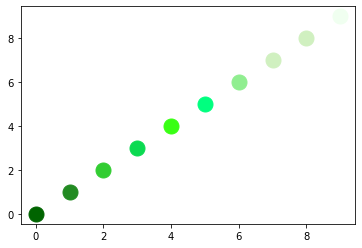

In [85]:
for i in range(10):
    plt.plot(i, i, '.', color=colors[i],  markersize=30)
plt.savefig(folder_name + '/Test.pdf', dpi=1500)  

In [86]:
def plot_custom_clusters_2(c_k_o_i, clusters_averages, clusters_labels, size, description, image_name, alpha=1, beta=0, not_outlier=False):
    X = np.array(select_df)
    
    for i in range(c_k_o_i.shape[0]):
        lab = int(sampled_df.iloc[i]['L'])
        if c_k_o_i[i][0] > 0:
            R = 1
        elif c_k_o_i[i][0] == 0:
            R = 0.6
        else:
            R = 0.2
        if c_k_o_i[i][1] >= 0:
            G = c_k_o_i[i][1]
        else:
            G = 0
        col = getColor(R)
        plt.plot(X[i][0], X[i][1], '.', color=col)
    
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig(image_name + '.pdf', dpi=1500)  

In [87]:
def plot_custom_clusters_3(c_k_o_i, c_k_o_i_2, operator, image_name):
    X = np.array(select_df)
    
    for i in range(c_k_o_i.shape[0]):
        lab = int(sampled_df.iloc[i]['L'])
        flag = False
        if operator == 'and':
            if c_k_o_i[i][lab] > 0 and c_k_o_i_2[i][lab] > 0:
                flag = True

        elif operator == 'or':
            if c_k_o_i[i][lab] > 0 or c_k_o_i_2[i][lab] > 0:
                flag = True

        if flag:
            G = 1
        elif c_k_o_i[i][0] == 0:
            G = 0.6
        else:
            G = 0.2

        col = getColor(G)
        
        plt.plot(X[i][0], X[i][1], '.', color=col)
    
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig(image_name + '.pdf', dpi=1500)  

In [88]:
#plot_custom_clusters_3(c_k_o_i_3_norm, c_k_o_i_min, 'and', folder_name + '/' + identity_name + '-minimum-result2')
#c_k_o_i_3_norm

In [89]:
# Method 3
#plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result3')

In [90]:
sampled_df.shape

(3000, 785)

In [91]:
sampled_df.describe().transpose()

count      mean       std  min  25%  50%  75%  max
Col1    3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col2    3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col3    3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col4    3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col5    3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
...        ...       ...       ...  ...  ...  ...  ...  ...
Col781  3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col782  3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col783  3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
Col784  3000.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
L       3000.0  4.439333  2.855936  0.0  2.0  4.0  7.0  9.0

[785 rows x 8 columns]

In [92]:
print(len(sampled_df[sampled_df.L == 0]))
print(len(sampled_df[sampled_df.L == 1]))

271
340



# From Here Started Our Method

In [93]:
label_col_name = 'L'
#num_neighbors = 7
num_neighbors_all = len(select_df)
print(len(select_df))

3000


In [94]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array(select_df)
kdt = KDTree(X, leaf_size=30, metric='euclidean')
knn = kdt.query(X, k=num_neighbors_all, return_distance=True)  

In [95]:
#knn[0] # Distances with neighbors
#knn[1]  # Indices of neighbours
#select_df.head()    
#knn[0].shape

In [96]:
row_neighbors_list_1 = {}
row_neighbors_dist_1 = {}

for i in range(knn[0].shape[0]):
    row_neighbors_list_1[i] = knn[1][i]
    row_neighbors_dist_1[i] = knn[0][i]
    #print(i, knn[i])


In [97]:
#row_neighbors_list_1

In [98]:
clusters = np.unique(sampled_df['L'])
    

In [99]:
centroids = getCentroids(clusters, sampled_df, features)
#centroids_nearest, centroids_nearest_dist = getCentroidNearest(clusters_labels, centroids)

In [100]:
for i in range(sampled_df.shape[0]):
    data_point = sampled_df[features].iloc[i]
    label = int(sampled_df.iloc[i]['L'])
    

In [101]:
centroids[0]

Col1      0.0
Col2      0.0
Col3      0.0
Col4      0.0
Col5      0.0
         ... 
Col780    0.0
Col781    0.0
Col782    0.0
Col783    0.0
Col784    0.0
Length: 784, dtype: float64

In [102]:
def getAveragDistance():
    average_distance = 0
    for i in range(sampled_df.shape[0]):
        data_point = sampled_df[features].iloc[i]
        label = int(sampled_df.iloc[i]['L'])
        if i%500 == 0 and i != 0:
            print(i)
        
        c_point = centroids[label]
        
        distance_sum = 0
        for col in features:
            distance_sum += (data_point[col] - c_point[col])**2
                        
        distance = sqrt(distance_sum)
        average_distance += distance
    
    return average_distance/len(sampled_df)

In [103]:
average_distance = getAveragDistance()
average_distance


500
1000
1500
2000
2500


1568.984265384305

In [104]:
clusters = np.unique(sampled_df['L'])
clusters = [int(x) for x in clusters]
clusters

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [105]:
#c_k_o_i_3 = calculate_silhouette_samples(sampled_df, features, file_measures, 'Minimum')
#c_k_o_i_3 = calculate_silhouette_samples_2(sampled_df, features, file_measures, 'Minimum')
#c_k_o_i_3 = calculate_silhouette_samples_3(sampled_df, features, clusters_labels, folder_name + '/' + identity_name + '-normal-result2')
c_k_o_i_3 = calculate_silhouette_samples_4(sampled_df, features, clusters, (average_distance/average_divid), folder_name + '/' + identity_name + '-normal-result2')

300
600
900
1200
1500
1800
2100
2400
2700


In [106]:
c_k_o_i_3[0:5,:]
#c_k_o_i_3[c_k_o_i_3 == 1] = np.max(c_k_o_i_3)

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        ,  1.        , -1.        , -1.        ],
       [-1.        , -1.        ,  1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        ,  0.96610169, -1.        , -1.        , -1.        ,
        -1.        , -1.        , -0.99152542, -1.        , -1.        ],
       [ 1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        ,  1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ]])

In [107]:
c_k_o_i_3_norm = c_k_o_i_3

In [108]:
c_k_o_i_3_norm[c_k_o_i_3_norm == 0]

array([0., 0.])

In [109]:
num_clusters_uni = len(np.unique(clusters))
num_clusters_uni

10

In [110]:
clusters_averages = np.zeros((num_clusters_uni, 3))
for i in range(c_k_o_i_3_norm.shape[0]):
    clusters_averages[int(sampled_df.iloc[i]['L'])][0] += c_k_o_i_3_norm[i][int(sampled_df.iloc[i]['L'])]
    clusters_averages[int(sampled_df.iloc[i]['L'])][1] += 1

In [111]:
clusters_averages

array([[271.        , 271.        ,   0.        ],
       [339.05401   , 340.        ,   0.        ],
       [313.        , 313.        ,   0.        ],
       [316.        , 316.        ,   0.        ],
       [318.        , 318.        ,   0.        ],
       [283.        , 283.        ,   0.        ],
       [272.        , 272.        ,   0.        ],
       [293.72222222, 306.        ,   0.        ],
       [286.        , 286.        ,   0.        ],
       [290.25      , 295.        ,   0.        ]])

In [112]:
for i in range(clusters_averages.shape[0]):
    clusters_averages[i][2] = round(clusters_averages[i][0]/clusters_averages[i][1],4)
    print(clusters_averages[i][2])

1.0
0.9972
1.0
1.0
1.0
1.0
1.0
0.9599
1.0
0.9839


In [113]:
clusters_averages

array([[271.        , 271.        ,   1.        ],
       [339.05401   , 340.        ,   0.9972    ],
       [313.        , 313.        ,   1.        ],
       [316.        , 316.        ,   1.        ],
       [318.        , 318.        ,   1.        ],
       [283.        , 283.        ,   1.        ],
       [272.        , 272.        ,   1.        ],
       [293.72222222, 306.        ,   0.9599    ],
       [286.        , 286.        ,   1.        ],
       [290.25      , 295.        ,   0.9839    ]])

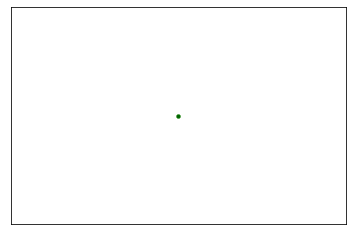

In [114]:
plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result2')


## Again Finding Neighbors for Spatial Filters

In [115]:
label_col_name = 'L'
num_neighbors = 7
#num_neighbors = len(select_df)
#print(len(select_df))

In [116]:
from sklearn.neighbors import KDTree
import numpy as np

X = np.array(select_df)
kdt = KDTree(X, leaf_size=30, metric='euclidean')
knn = kdt.query(X, k=num_neighbors, return_distance=False)  

In [117]:
knn.shape

(3000, 7)

In [118]:
row_neighbors_list = {}

for i in range(knn.shape[0]):
    row_neighbors_list[i] = knn[i]
    #print(i, knn[i])

In [119]:
for index in row_neighbors_list:
    #print((row_neighbors_list[index]))
    mylist = row_neighbors_list[index]
    #print("______________")

In [120]:
def getClustersInside(dataset, c_k_o_i, alpha = 1.0):
    cluster_inside = {}
    cluster_inside = set(cluster_inside)
    dataset['Col2'][0]
    
    clusters_labels = {}
    
    final_list = []
    my_dict = {}
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            if c_k_o_i[i][j] >= alpha:
                #obj = [dataset['Col1'][i], dataset['Col2'][i], j]
                obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_list:
                    final_list.append(obj)
                cluster_inside.add(obj)
                clusters_labels[obj] = j
                
                # Try to keep Maximum Valued Record in a dictionay
                key = (dataset['Col1'][i], dataset['Col2'][i])
                if key in my_dict:
                    if my_dict[key] < c_k_o_i[i][j]:
                        my_dict[key] = c_k_o_i[i][j]
                else:
                    my_dict[key] = c_k_o_i[i][j]

    return clusters_labels, final_list, cluster_inside, my_dict


In [121]:
def getNeighbors(index, cluster_label, c_k_o_i):
    #neighbor_c_k_o_i = np.zeros(num_neighbors+1)
    neighbor_c_k_o_i = np.zeros(num_neighbors)
    out_flag = False
    
    for i in range(num_neighbors):
        neighbor_index = row_neighbors_list[index][i]
        neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
        if int(cluster_label) != int(sampled_df.iloc[neighbor_index]['L']):
            out_flag = True
        
    #Considering neighbors of point as well as point itself
    #neighbor_c_k_o_i[i+1] = c_k_o_i[index][int(cluster_label)]

    return neighbor_c_k_o_i, out_flag


In [122]:
def getClustersIn_Out_Part(dataset, c_k_o_i, clusters_averages, alpha = 1.0, beta = 0.0, not_outlier=False):
    cluster_inside = {}
    cluster_outside = {}
    cluster_partial = {}

    cluster_inside = set(cluster_inside)
    cluster_outside = set(cluster_outside)
    cluster_partial = set(cluster_partial)
    
    clusters_labels = {}
    
    final_inside = []
    final_outside = []
    final_partial = []
    
    dict_inside = {}
    dict_outside = {}
    dict_partial = {}
    
    outliers_indices = []
    
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            
            obj = [] 
            for col in features:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                obj.append(dataset[col][i])
            obj = tuple(obj)
            
            cluster_neighbors, out_flag = getNeighbors(i,j,c_k_o_i)
            mean = np.mean(cluster_neighbors)
            std = np.std(cluster_neighbors)
            
            if (mean-(3*std) <= c_k_o_i[i][j] <= mean+(3*std)) and not out_flag:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                #print(c_k_o_i[i][j])
                if obj not in final_inside:
                    final_inside.append(obj)
                
                # Remove from partial as well as outside
                if obj in final_partial:
                    #print("Removed... " + str(obj))
                    final_partial.remove(obj)
                    
                #For outliers
                if i in outliers_indices:
                    outliers_indices.remove(i)
                
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Inside 
                #cluster_inside.add(obj)
                clusters_labels[obj] = j

                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_inside:
                    if dict_inside[key] < c_k_o_i[i][j]:
                        dict_inside[key] = c_k_o_i[i][j]
                else:
                    dict_inside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] <= beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_outside and obj not in final_inside and obj not in final_partial:
                    final_outside.append(obj)
                    
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1
                
                #Cluster outside 
                #cluster_outside.add(obj)
                
                # Try to keep Maximum Valued Record in a dictionay
                key = obj
                if key in dict_outside:
                    if dict_outside[key] < c_k_o_i[i][j]:
                        dict_outside[key] = c_k_o_i[i][j]
                else:
                    dict_outside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] < alpha and c_k_o_i[i][j] > beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_partial and obj not in final_inside:
                    final_partial.append(obj)
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1

                # Remove from outside
                if obj in final_outside:
                    final_outside.remove(obj)
                
                #Cluster Partial
                #cluster_partial.add(tuple(obj)) 
 
                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_partial:
                    if dict_partial[key] < c_k_o_i[i][j]:
                        dict_partial[key] = c_k_o_i[i][j]
                else:
                    dict_partial[key] = c_k_o_i[i][j]

            
    #return cluster_inside, cluster_outside, cluster_partial, final_inside, final_outside, final_partial, dict_inside, dict_outside, dict_partial
    return clusters_labels, final_inside, final_outside, final_partial, outliers_indices


In [123]:
def getClustersIn_Out_Part_3(dataset, c_k_o_i, c_k_o_i_2, operator, alpha = 1.0, beta = 0.0, not_outlier=False):
    cluster_inside = {}
    cluster_outside = {}
    cluster_partial = {}

    cluster_inside = set(cluster_inside)
    cluster_outside = set(cluster_outside)
    cluster_partial = set(cluster_partial)
    
    clusters_labels = {}
    
    final_inside = []
    final_outside = []
    final_partial = []
    
    dict_inside = {}
    dict_outside = {}
    dict_partial = {}
    
    outliers_indices = []
    
    for i in range(c_k_o_i.shape[0]):
        #inner_list = []
        for j in range(c_k_o_i.shape[1]):
            
            obj = [] 
            for col in features:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                obj.append(dataset[col][i])
            obj = tuple(obj)
            
            cluster_neighbors, out_flag = getNeighbors(i,j,c_k_o_i)
            mean = np.mean(cluster_neighbors)
            std = np.std(cluster_neighbors)
            
            flag = False
            if operator == 'and':
                if c_k_o_i[i][j] > 0 and c_k_o_i_2[i][j] > 0:
                    flag = True

            elif operator == 'or':
                if c_k_o_i[i][j] > 0 or c_k_o_i_2[i][j] > 0:
                    flag = True
            
            if flag:
                if obj not in final_inside:
                    final_inside.append(obj)
                
                # Remove from partial as well as outside
                if obj in final_partial:
                    final_partial.remove(obj)
                    
                #For outliers
                if i in outliers_indices:
                    outliers_indices.remove(i)
                
                if obj in final_outside:
                    final_outside.remove(obj)
                
                clusters_labels[obj] = j

                key = obj
                if key in dict_inside:
                    if dict_inside[key] < c_k_o_i[i][j]:
                        dict_inside[key] = c_k_o_i[i][j]
                else:
                    dict_inside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] <= beta:
                if obj not in final_outside and obj not in final_inside and obj not in final_partial:
                    final_outside.append(obj)
                    
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1
                
                # Try to keep Maximum Valued Record in a dictionay
                key = obj
                if key in dict_outside:
                    if dict_outside[key] < c_k_o_i[i][j]:
                        dict_outside[key] = c_k_o_i[i][j]
                else:
                    dict_outside[key] = c_k_o_i[i][j]

            elif c_k_o_i[i][j] < alpha and c_k_o_i[i][j] > beta:
                #obj = (dataset['Col1'][i], dataset['Col2'][i])
                if obj not in final_partial and obj not in final_inside:
                    final_partial.append(obj)
                    #For outliers
                    if i not in outliers_indices:
                        outliers_indices.append(i)

                    if not_outlier:
                        clusters_labels[obj] = j
                    else:
                        clusters_labels[obj] = -1

                # Remove from outside
                if obj in final_outside:
                    final_outside.remove(obj)
                
                # Try to keep Maximum Valued Record in a dictionay
                #key = (dataset['Col1'][i], dataset['Col2'][i])
                key = obj
                if key in dict_partial:
                    if dict_partial[key] < c_k_o_i[i][j]:
                        dict_partial[key] = c_k_o_i[i][j]
                else:
                    dict_partial[key] = c_k_o_i[i][j]

    return clusters_labels, final_inside, final_outside, final_partial, outliers_indices


In [124]:
def getClusters_Centroids_MeanDistance(dataset, features_set, label_col_name, knn):
    import math
    
    clusters_labels = np.unique(dataset[label_col_name])        
    clusters_centroids = {}
        
    for i in range(len(clusters_labels)):
        # Get all records of specific cluster
        cluster_dataset = dataset[features_set].loc[dataset[label_col_name] == clusters_labels[i]]
        
        sum_of_cluster = np.sum(cluster_dataset, axis=0)
        centroid = sum_of_cluster/len(cluster_dataset)
        average_distance = 0
        total_distance = 0
        centroid_distances_all = np.zeros(len(cluster_dataset))
        #print("centroid: ", centroid)
        total_average_distances_list = np.zeros(len(cluster_dataset))
        neighbor_distance_list = np.zeros(knn.shape[1])
        j = 0
        for index, o_c in cluster_dataset.iterrows():                                                              
            
            #print("o_c: ", o_c)
            
            centroid_distance = 0
            for col in features_set:
                if col != label_col_name:
                    centroid_distance += (o_c[col] - centroid[col])**2
                    #print(col, ":", (o_c[col] - centroid[col])**2)

            #print("index: ", index)
            for k in range(knn.shape[1]):
                neighbor_distance = 0
                for col in features_set:
                    #print(dataset.iloc[knn[index][k]][col])
                    if col != label_col_name:
                        neighbor_distance += (dataset.iloc[index][col] - dataset.iloc[knn[index][k]][col])**2
            
                neighbor_distance_list[k] =  math.sqrt(neighbor_distance)
                #print(dataset.iloc[knn[index][j]])
            
            centroid_distance = math.sqrt(centroid_distance)
            centroid_distances_all[j] = centroid_distance
            #print(centroid_distance)
            total_distance += centroid_distance
            total_average_distances_list[j] = np.mean(neighbor_distance_list)
            j += 1
        
        #print(total_average_distances_list)
        #print(total_distance)
        centroid_distance_std = np.std(centroid_distances_all)
        
        total_average_distance = np.sum(total_average_distances_list)
        average_distance_std = np.std(total_average_distances_list)
        average_distance_average = total_average_distance/len(cluster_dataset)
        clusters_centroids[clusters_labels[i]] = (centroid,average_distance,average_distance_average, average_distance_std,centroid_distance_std)
    return clusters_centroids

In [125]:
clusters_centroids = getClusters_Centroids_MeanDistance(sampled_df, features, label_col_name, knn)

In [126]:
print("Centroid,  Average_distance, Average_distance_average,  Average_distance_std")
#clusters_centroids

Centroid,  Average_distance, Average_distance_average,  Average_distance_std


import random
colors = ['red', 'green', 'blue', 'brown', 'cyan', 'purple', 'yellow', 'magenta']

for each in np.linspace(0, 1, num_of_clusters, retstep=False):
    colors.append(plt.cm.Spectral(each))

colors.append('black')
print("Clusters: ", num_of_clusters)
print("Colors: ", len(colors))


In [127]:
import operator
import math

In [128]:
#Applying Spatial Filters to Get New Evalaution Values

def getUpdatedEvaluationValues(dataset, dataset_neighbors, label_col_name, c_k_o_i, features_set):
    import operator
    clusters_labels = np.unique(dataset[label_col_name])
    c_k_o_i_mean = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_min = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_max = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_median = np.zeros((len(dataset),len(clusters_labels)))
    c_k_o_i_laplacian = np.zeros((len(dataset),len(clusters_labels)))
    
    #Considering only neighbors of point
    #neighbor_c_k_o_i = np.zeros(num_neighbors)

    #Considering neighbors of point as well as point itself
    neighbor_c_k_o_i = np.zeros(num_neighbors+1)
    
    for cluster_label in clusters_labels:
        for index in row_neighbors_list:
            total_distance= 0
            for i in range(num_neighbors):
                neighbor_index = row_neighbors_list[index][i]
                
                ####################
                distance = 0
                neighbor_obj = dataset.iloc[neighbor_index]
                o_c = dataset.iloc[index]
                
                for col in features_set:
                    if col != label_col_name:
                        distance += (neighbor_obj[col] - o_c[col])**2

                distance = math.sqrt(distance)
                
                average_distance = clusters_centroids[cluster_label][1]
                centroid_distance_std = clusters_centroids[cluster_label][4]
                
                cluster_average_average = clusters_centroids[cluster_label][2]
                cluster_average_std = clusters_centroids[cluster_label][3]
                
                #Code to consider only those neighbors which are in specific radius
                '''
                if distance > (sigma_multiples*cluster_average_std + cluster_average_average):
                    #print("distance", distance)
                    #print("cluster_average_std", cluster_average_std)
                    #print("cluster_average_average", cluster_average_average)
                    #print("3*sigma + Mean", sigma_multiples*cluster_average_std + cluster_average_average)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                '''
                #Code to consider only those neighbors which are in specific radius based on centroid distance
                
                '''
                if distance > (sigma_multiples*centroid_distance_std + average_distance):
                    print("distance", distance)
                    print("centroid_distance_std", centroid_distance_std)
                    print("average_distance", average_distance)
                    print("3*sigma + Mean", sigma_multiples*centroid_distance_std + average_distance)
                    
                    #neighbor_c_k_o_i[i] = c_k_o_i[index][int(cluster_label)] # Assign object evaluation value
                    #neighbor_c_k_o_i[i] = 0  # Assign 0 evaluation value
                    neighbor_c_k_o_i[i] = (sigma_multiples*cluster_average_std + cluster_average_average)/distance
                else:
                    neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                '''
                
                # Code not consider radius for neighbors
                neighbor_c_k_o_i[i] = c_k_o_i[neighbor_index][int(cluster_label)]
                
                total_distance += distance

            #Considering neighbors of point as well as point itself
            neighbor_c_k_o_i[i+1] = c_k_o_i[index][int(cluster_label)]
            
            #neighbor_c_k_o_i = np.sort(neighbor_c_k_o_i)
            
            c_k_o_i_mean[index][int(cluster_label)] =  np.mean(neighbor_c_k_o_i)
            c_k_o_i_min[index][int(cluster_label)] =  np.nanmin(neighbor_c_k_o_i)
            c_k_o_i_max[index][int(cluster_label)] =  np.nanmax(neighbor_c_k_o_i)
            c_k_o_i_median[index][int(cluster_label)] =  np.median(neighbor_c_k_o_i)
            
            laplacian_value = np.sum(neighbor_c_k_o_i[0:num_neighbors]) - neighbor_c_k_o_i[num_neighbors]*(num_neighbors)
            c_k_o_i_laplacian[index][int(cluster_label)] = (laplacian_value-(-num_neighbors))/(num_neighbors-(-num_neighbors))
                
    return c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian

In [129]:
# Normal
#c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i, features)

# Method 1: Nearest in C / Nearest Not in C
#c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i_norm, features)

# Method 2: Nearest in C / Farthest in C
c_k_o_i_mean, c_k_o_i_min, c_k_o_i_max, c_k_o_i_median, c_k_o_i_laplacian = getUpdatedEvaluationValues(sampled_df, row_neighbors_list, label_col_name, c_k_o_i_3_norm, features)

In [130]:
print(len(c_k_o_i_min[c_k_o_i_min  == 0]))
print(len(c_k_o_i_max[c_k_o_i_max  == 0]))
print(len(c_k_o_i_mean[c_k_o_i_mean == 0]))
print(len(c_k_o_i_3_norm[c_k_o_i_3_norm == 0]))

4
3
191
2


In [131]:
write_to_file('../Files/sampled_df.csv', np.array(sampled_df))
write_to_file('../Files/c_k_o_i.csv', c_k_o_i_3_norm)
write_to_file('../Files/c_k_o_i_mean.csv', c_k_o_i_mean)
write_to_file('../Files/c_k_o_i_min.csv', c_k_o_i_min)
write_to_file('../Files/c_k_o_i_max.csv', c_k_o_i_max)
write_to_file('../Files/c_k_o_i_median.csv', c_k_o_i_median)
write_to_file('../Files/c_k_o_i_laplacian.csv', c_k_o_i_laplacian)

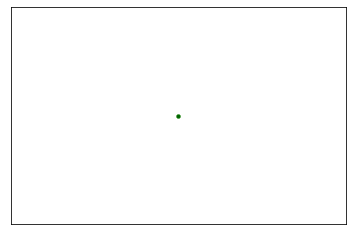

In [132]:
plot_custom_clusters_2(c_k_o_i_3_norm, clusters_averages, clusters_labels, 5, "Normal Evaluation: ", folder_name + '/' + identity_name + '-normal-result2')


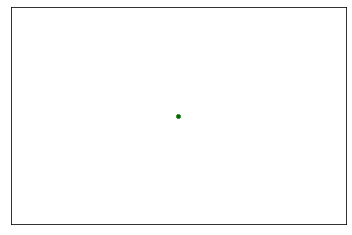

In [133]:
#plot_custom_clusters_2(c_k_o_i_min, clusters_averages, clusters_labels, 5, "Minimum Evaluation: ", folder_name + '/' + identity_name + '-minimum-result2')
plot_custom_clusters_3(c_k_o_i_3_norm, c_k_o_i_min, 'and', folder_name + '/' + identity_name + '-minimum-result2')

Total Inside:  1875
Total Outside:  1125
Total Partial:  0


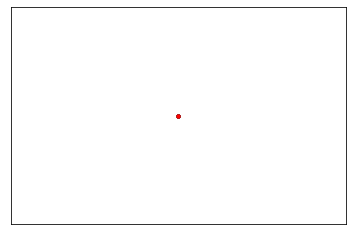

In [134]:
alpha = 1
#clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp, clusters_averages, alpha)
clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part_3(sampled_df, c_k_o_i_3_norm, c_k_o_i_min, 'and', alpha)
print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

plot_custom_clusters(final_inside, clusters_labels, 5, colors_inside, "Minimum (Inside) Plot: ", folder_name + '/' + identity_name + '-minimum-3wc-inside')


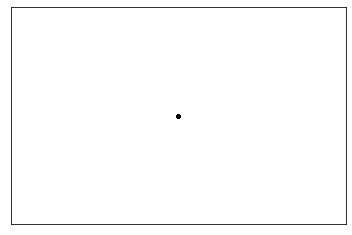

In [135]:
final_list = final_inside + final_partial + final_outside

plot_custom_clusters(final_list, clusters_labels, 5, colors_inside, "Minimum Plot: ", folder_name + '/' + identity_name + '-minimum-3wc-results')

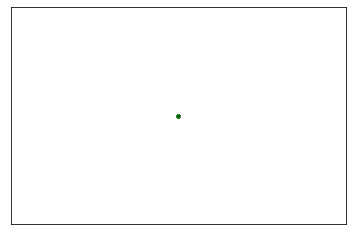

In [136]:
#plot_custom_clusters_2(c_k_o_i_mean, clusters_averages, clusters_labels, 5, "Blurred Evaluation: ", folder_name + '/' + identity_name + '-blurred-result')
plot_custom_clusters_3(c_k_o_i_3_norm, c_k_o_i_mean, 'and', folder_name + '/' + identity_name + '-blurred-result')

In [137]:
c_k_o_i_mean.shape
c_k_o_i_3_norm.shape

(3000, 10)

Total Inside:  2713
Total Outside:  287
Total Partial:  0


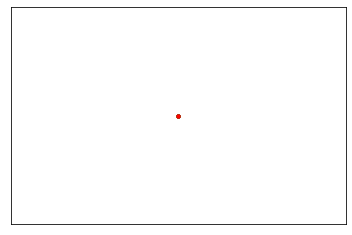

In [165]:
alpha = 1
#clusters_labels, final_inside, cluster_inside, my_dict = getClustersInside(sampled_df, c_k_o_i_mean, alpha)
#clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_mean, clusters_averages, alpha)
clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part_3(sampled_df, c_k_o_i_3_norm, c_k_o_i_mean, 'and', alpha)

print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

plot_custom_clusters(final_inside, clusters_labels, 5, colors_inside, "Blurr (Inside) Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-inside')


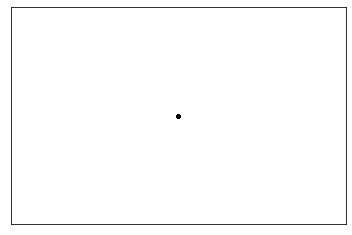

In [139]:
final_list = final_inside + final_partial + final_outside

plot_custom_clusters(final_list, clusters_labels, 5, colors_inside, "Blurr Plot: ", folder_name + '/' + identity_name + '-blurred-3wc-results')

In [140]:
c_k_o_i_diff = np.zeros((c_k_o_i_3_norm.shape[0],c_k_o_i_3_norm.shape[1]))
for i in range(c_k_o_i_3_norm.shape[0]):
    for j in range(c_k_o_i_3_norm.shape[1]):
        #c_k_o_i_diff[i][j] = c_k_o_i[i][j] - c_k_o_i_mean[i][j]
        c_k_o_i_diff[i][j] = c_k_o_i_3_norm[i][j] - c_k_o_i_mean[i][j]

#Sharp Image = Original + Difference
c_k_o_i_sharp = np.zeros((c_k_o_i_3_norm.shape[0],c_k_o_i_3_norm.shape[1]))
for i in range(c_k_o_i_3_norm.shape[0]):
    for j in range(c_k_o_i_3_norm.shape[1]):
        #c_k_o_i_sharp[i][j] = c_k_o_i[i][j] + c_k_o_i_diff[i][j]
        c_k_o_i_sharp[i][j] = c_k_o_i_3_norm[i][j] + c_k_o_i_diff[i][j]
        if c_k_o_i_sharp[i][j] > 1:
            c_k_o_i_sharp[i][j] = 1
        

In [141]:
c_k_o_i_sharp.shape

(3000, 10)

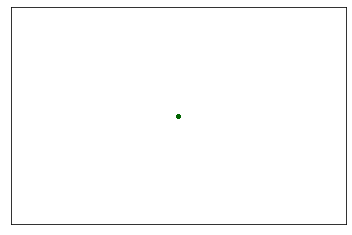

In [142]:
#plot_custom_clusters_2(c_k_o_i_sharp, clusters_averages, clusters_labels, 5, "Sharpe Evaluation: ", folder_name + '/' + identity_name + '-sharpe-result')
plot_custom_clusters_3(c_k_o_i_3_norm, c_k_o_i_sharp, 'or', folder_name + '/' + identity_name + '-sharpe-result')

Total Inside:  2991
Total Outside:  9
Total Partial:  0


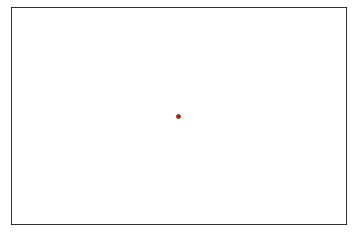

In [143]:
alpha = 1
#clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part(sampled_df, c_k_o_i_sharp, clusters_averages, alpha)
clusters_labels, final_inside, final_outside, final_partial, outliers_indices = getClustersIn_Out_Part_3(sampled_df, c_k_o_i_3_norm, c_k_o_i_sharp, 'or', alpha)
print("Total Inside: ", len(final_inside))
print("Total Outside: ", len(final_outside))
print("Total Partial: ", len(final_partial))

plot_custom_clusters(final_inside, clusters_labels, 5, colors_inside, "Sharpe (Inside) Plot: ", folder_name + '/' + identity_name + '-sharpe-3wc-inside')


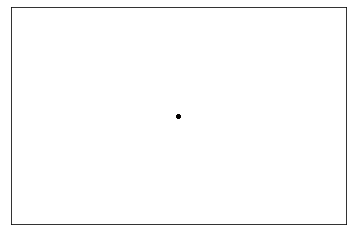

In [144]:
final_list = final_inside + final_partial + final_outside

plot_custom_clusters(final_list, clusters_labels, 5, colors_inside, "Sharpe (Inside) Plot: ", folder_name + '/' + identity_name + '-sharpe-3wc-results')


In [ ]:
i = 0 
for inside in final_inside:
    i += 1
    #print(np.array(out).reshape(28,28))
    plt.imshow(np.array(inside).reshape(28,28), cmap=plt.cm.binary)
    #plt.title(str(description))
        
    #plt.gca().axes.get_yaxis().set_visible(False)
    #plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig('data/inside/' + str(i) + '.pdf')  
    

In [167]:
i = 0 
for partial in final_partial:
    i += 1
    #print(np.array(out).reshape(28,28))
    plt.imshow(np.array(partial).reshape(28,28), cmap=plt.cm.binary)
    #plt.title(str(description))
        
    #plt.gca().axes.get_yaxis().set_visible(False)
    #plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig('data/partial/' + str(i) + '.pdf')  
    

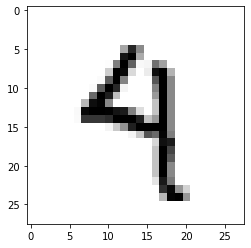

In [168]:
i = 0 
for out in final_outside:
    i += 1
    #print(np.array(out).reshape(28,28))
    plt.imshow(np.array(out).reshape(28,28), cmap=plt.cm.binary)
    #plt.title(str(description))
        
    #plt.gca().axes.get_yaxis().set_visible(False)
    #plt.gca().axes.get_xaxis().set_visible(False)
    plt.savefig('data/outside/' + str(i) + '.pdf')  
    

In [145]:
c_k_o_i_sharp[c_k_o_i_sharp == 0]

array([], dtype=float64)

In [146]:
for i in range(c_k_o_i_mean.shape[0]):
    for i in range(c_k_o_i_mean.shape[1]):
        if c_k_o_i_mean[i][j] > 0 and c_k_o_i_sharp[i][j] <= 0:
            print(i,j)
        if c_k_o_i_sharp[i][j] > 0 and c_k_o_i_mean[i][j] <= 0:
            print(i,j)

In [147]:
#!pip install idx2numpy

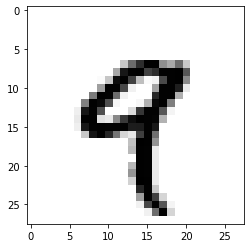

In [234]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt

imagefile = 'data/train-images.idx3-ubyte'
trainX = idx2numpy.convert_from_file(imagefile)
plt.imshow(trainX[4], cmap=plt.cm.binary)

imagefile = 'data/train-labels.idx1-ubyte'
trainY = idx2numpy.convert_from_file(imagefile)

imagefile = 'data/t10k-images.idx3-ubyte'
testX = idx2numpy.convert_from_file(imagefile)
imagefile = 'data/t10k-labels.idx1-ubyte'
testY = idx2numpy.convert_from_file(imagefile)



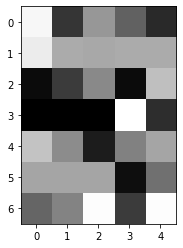

In [210]:
trainXX = []
for i in trainX[7]:
    for j in i:
        if j < 200 and j> 100:
            trainXX.append(j)

trainXX = np.array(trainXX).reshape(7,5)
plt.imshow(trainXX, cmap=plt.cm.binary)


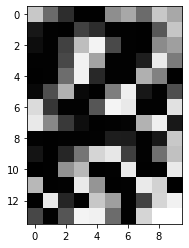

In [249]:
trainXX = []
for i in trainX[4]:
    for j in i:
        if j > 10:
            trainXX.append(j)

trainXX.append(0)
trainXX.append(0)
trainXX = np.array(trainXX).reshape(14,10)
plt.imshow(trainXX, cmap=plt.cm.binary)

In [248]:
140/10

14.0

In [10]:
trainY.shape

(60000,)

In [24]:
testX[0:3000].shape

(3000, 28, 28)

In [20]:
testY.shape

(10000,)

In [25]:
merged_test = np.hstack((testX[0:3000].reshape(3000,784), testY[0:3000].reshape(3000,1)))

In [35]:
features = ['Col'+str(i+1) for i in range(784)]
features.append('L')
#features

In [28]:
merged_test

array([[0, 0, 0, ..., 0, 0, 7],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [31]:
write_to_file('data/mnist_test.csv', merged_test, features)


In [172]:
#write_to_file('data/mnist_test_labels.csv', testY[3000].reshape(10000,1))
trainX.shape

(60000, 28, 28)

In [173]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(trainX.reshape(60000,784))

pca_result

array([[ 123.92040735, -312.69838283],
       [1011.72113749, -294.84688935],
       [ -51.85929924,  392.15195957],
       ...,
       [-178.05350657,  160.0706072 ],
       [ 130.60254978,   -5.6095224 ],
       [-173.43114328,  -24.715246  ]])

In [174]:
pca_result.shape

(60000, 2)

In [176]:
merged_test = np.hstack((pca_result, trainY.reshape(60000,1)))

In [178]:
write_to_file('data/mnist_pca_train.csv', merged_test, ['Col1','Col2','L'])
